<a href="https://colab.research.google.com/github/zaRizk7/rock-paper-scissors-dicoding/blob/main/MachineLearningProjectDicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-addons
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
!unzip rockpaperscissors.zip -d .
!cp -r rockpaperscissors/rps-cv-images/* rockpaperscissors
!rm -rf rockpaperscissors/rps-cv-images rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: ./rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: ./rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: ./rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: ./rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: ./rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: ./__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: ./rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: ./__MACOSX/rockpapersciss

In [2]:
import warnings
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=.4,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=.25,
    height_shift_range=.25
)

generator_config = dict(
    directory='rockpaperscissors',
    batch_size=32,
    color_mode='rgb',
    target_size=(128, 128),
    class_mode='categorical'
)

train_generator = image_generator.flow_from_directory(
    subset='training',
    **generator_config
)

validation_generator = image_generator.flow_from_directory(
    subset='validation',
    **generator_config
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [4]:
model_config = dict(
    layers=[
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 
                                   input_shape=(128, 128, 3), name='conv2d_1'),
            tf.keras.layers.MaxPooling2D(2, 2, name='pool2d_1'),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_2'),
            tf.keras.layers.MaxPooling2D(2, 2, name='pool2d_2'),
            tf.keras.layers.Flatten(name='flatten'),
            tf.keras.layers.Dense(256, activation='relu', name='fc_1'),
            tf.keras.layers.Dense(3, activation='softmax', name='classifier')
    ],
    name='simple_cnn'
)

compile_config = dict(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
             tf.keras.metrics.CategoricalAccuracy(),
             tfa.metrics.F1Score(
                 num_classes=3,
                 average='macro'
             )
    ]
)

fit_config = dict(
    x=train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[
               tf.keras.callbacks.ModelCheckpoint(
                   filepath='best_model.h5',
                   monitor='f1_score',
                   save_best_only=True,
                   mode='max',
                   save_weights_only=False,
                   save_freq=5
               ),
               tf.keras.callbacks.EarlyStopping(
                   monitor='f1_score',
                   min_delta=0.1,
                   patience=10,
                   mode='max'
               )
    ]
)

In [5]:
model = tf.keras.Sequential(**model_config)

model.compile(**compile_config)
model.summary()

Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
pool2d_1 (MaxPooling2D)      (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
pool2d_2 (MaxPooling2D)      (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               29491456  
_________________________________________________________________
classifier (Dense)           (None, 3)                 7

In [6]:
history = model.fit(**fit_config).history

Epoch 1/20
42/42 [==============================] - 47s 350ms/step - loss: 3.0238 - categorical_accuracy: 0.4033 - f1_score: 0.3949 - val_loss: 1.1277 - val_categorical_accuracy: 0.3627 - val_f1_score: 0.2620
Epoch 2/20
42/42 [==============================] - 12s 297ms/step - loss: 1.0908 - categorical_accuracy: 0.4285 - f1_score: 0.4258 - val_loss: 1.0706 - val_categorical_accuracy: 0.3844 - val_f1_score: 0.2715
Epoch 3/20
42/42 [==============================] - 15s 363ms/step - loss: 1.0569 - categorical_accuracy: 0.5221 - f1_score: 0.5217 - val_loss: 0.8952 - val_categorical_accuracy: 0.6705 - val_f1_score: 0.6431
Epoch 4/20
42/42 [==============================] - 23s 547ms/step - loss: 0.9063 - categorical_accuracy: 0.6263 - f1_score: 0.6249 - val_loss: 6.1718 - val_categorical_accuracy: 0.4302 - val_f1_score: 0.3227
Epoch 5/20
42/42 [==============================] - 36s 866ms/step - loss: 0.8781 - categorical_accuracy: 0.6880 - f1_score: 0.6877 - val_loss: 0.7276 - val_categor

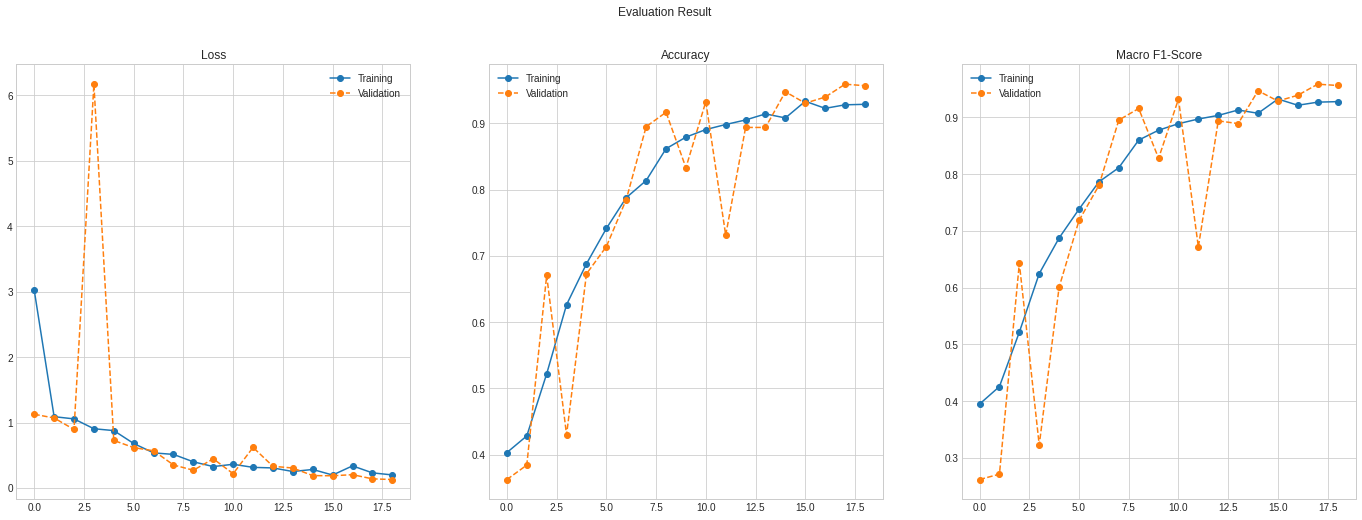

In [7]:
# Initialize plots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24, 8))
fig.suptitle('Evaluation Result')

# Subplot 1
ax1.set_title('Loss')
ax1.plot(history['loss'], 'o-', label='Training')
ax1.plot(history['val_loss'], 'o--', label='Validation')
ax1.legend()

# Subplot 2
ax2.set_title('Accuracy')
ax2.plot(history['categorical_accuracy'], 'o-', label='Training')
ax2.plot(history['val_categorical_accuracy'], 'o--', label='Validation')
ax2.legend()

# Subplot 3
ax3.set_title('Macro F1-Score')
ax3.plot(history['f1_score'], 'o-', label='Training')
ax3.plot(history['val_f1_score'], 'o--', label='Validation')
ax3.legend()

# Show plot
fig.show()

Saving Rock-paper-scissors_(rock).png to Rock-paper-scissors_(rock).png
Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors).png


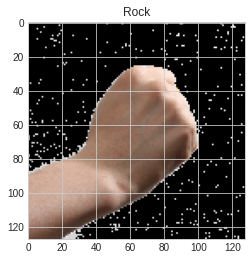

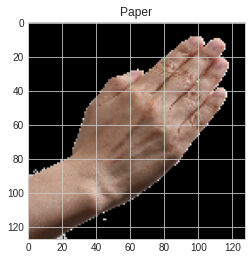

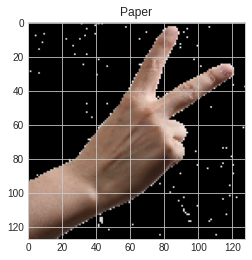

In [8]:
label = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}

for path in files.upload().keys():
  # Load image
  img = image.load_img(
      path=path, 
      target_size=generator_config['target_size']
  )

  # Convert image to numpy
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) / 255

  # Predict label
  predicted_label = label[np.argmax(model.predict(x))]

  # Show image with predicted label
  plt.figure()
  plt.title(predicted_label)
  plt.imshow(img)